Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [318]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [319]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)



daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [320]:
daily_engagement[0],project_submissions[0]

({u'acct': u'0',
  u'lessons_completed': u'0.0',
  u'num_courses_visited': u'1.0',
  u'projects_completed': u'0.0',
  u'total_minutes_visited': u'11.6793745',
  u'utc_date': u'2015-01-09'},
 {u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': u'2015-01-16',
  u'creation_date': u'2015-01-14',
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'})

In [323]:
len(daily_engagement), len(project_submissions), len(enrollments)
# they should have same unique students

(136240, 3642, 1640)

## Fixing Data Types

In [324]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [325]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [326]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [327]:
daily_engagement

[{u'acct': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {u'acct': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {u'acct': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 53.6337463333,
  u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
 {u'acct': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 33.4892696667,
  u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
 {u'acct': u'0',
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 64.7796776667,
  u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)},
 {u'acct': u'0

In [328]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def count_unique_value(lst, value):
    return len(set(item[value] for item in lst))


### unique account in enrollments
print(count_unique_value(enrollments,'account_key'))


### in daily_engagement
print(count_unique_value(daily_engagement,'acct'))

### in submission
print(count_unique_value(project_submissions, 'account_key'))

1302
1237
743


## Problems in the Data

In [316]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

def change_key(lst, old_key, new_key):
    for item in lst:
        item[new_key] = item[old_key]
        del(item[old_key])
        
change_key(daily_engagement,u'acct',u'account_key')
daily_engagement[0]

{u'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Missing Engagement Records

In [331]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

def set_of_unique_value(lst, value):
    return set(item[value] for item in lst)

unique_student = set_of_unique_value(daily_engagement, 'account_key')

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_student:
        print(student)
        break;              # if print all missing student, remove this line

KeyError: 'account_key'

## Checking for More Problem Records

In [235]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_suprising = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_student and enrollment[u'join_date'] != enrollment[u'cancel_date']:
        print(student)
        num_suprising +=1

print('Number of suprising data points: %s' % num_suprising)


1304
1304
1101
Number of suprising data points: 3


## Tracking Down the Remaining Problems

In [236]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [237]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [238]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [333]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict()

for enrollment in non_udacity_enrollments:
    # student = enrollment['account_key']
    
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key'] 
        enroll_date = enrollment['join_date']
        
        if (account_key not in paid_students or enroll_date > paid_students[account_key]):
            paid_students[account_key] = enroll_date

len(paid_students)


995

## Getting Data from First Week

In [240]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return  0<= time_delta.days < 7

In [334]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []


def opt_in_paid(data):
    paid_and_in_data = []

    for item in data:
        account_key = item['account_key']
        if account_key in paid_students:
            paid_and_in_data.append(item)
    return paid_and_in_data

paid_engagement = opt_in_paid(non_udacity_engagement)

for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engage_date = engagement['utc_date']
    if within_one_week(join_date, engage_date):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)
    

6919

## Exploring Student Engagement

In [242]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [243]:
engagement_by_account

defaultdict(list,
            {u'344': [{u'account_key': u'344',
               u'lessons_completed': 0,
               u'num_courses_visited': 2,
               u'projects_completed': 0,
               u'total_minutes_visited': 20.0477405,
               u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
              {u'account_key': u'344',
               u'lessons_completed': 2,
               u'num_courses_visited': 1,
               u'projects_completed': 0,
               u'total_minutes_visited': 301.955414,
               u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
              {u'account_key': u'344',
               u'lessons_completed': 0,
               u'num_courses_visited': 1,
               u'projects_completed': 0,
               u'total_minutes_visited': 57.5928861667,
               u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)},
              {u'account_key': u'344',
               u'lessons_completed': 1,
               u'num_courses_visited': 1,
    

In [244]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [245]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 261.836637932
Standard deviation: 388.625347977
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [246]:
total_minutes

[104.110932,
 196.3044158337,
 129.85920366667,
 22.4311658333,
 809.546996001,
 0.0,
 0.0,
 726.26075933267,
 614.9778563333,
 494.88049616599994,
 248.12435916639998,
 713.3479524992999,
 392.473794834,
 35.531418,
 0.0,
 83.295313,
 57.3305648333,
 1138.3177014993998,
 1764.5367983344001,
 105.712802667,
 0.0,
 211.3875440003,
 0.0,
 21.086721,
 876.6454899994,
 9.4907925,
 0.0,
 0.0,
 307.3006509996,
 269.1697889997,
 139.060529,
 253.23675750029997,
 3.56199133333,
 513.8126981664001,
 357.275143834,
 92.5547231666,
 101.387314333,
 193.848226,
 127.15142850000001,
 27.7252703333,
 311.1889536663,
 44.505795,
 1768.5227493319999,
 366.3194163334,
 290.1569196667,
 21.8352788333,
 29.7377383333,
 0.0,
 115.15559099992998,
 93.6202205,
 213.4699951663,
 0.0,
 199.06043566667,
 338.67828999970004,
 405.600248833,
 421.6092228329,
 192.665344,
 497.8218254996,
 442.37721166627,
 0.0,
 0.0,
 0.0,
 0.0,
 488.40353200030006,
 335.5259626667,
 51.1061375,
 1047.649452501,
 311.07236283327

In [247]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

max_min = 0

for key,value in total_minutes_by_account.items():
    if value > max_min:
        max_min = value

max_min



3564.7332644989997

In [248]:
student_with_max_minutes = None

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

## Lessons Completed in First Week

In [249]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data


def summarize_data(data):
    print('Mean    : %s' % np.mean(data))
    print('Std. Dev: %s' % np.std(data))
    print('Max     : %s' % np.max(data))
    print('Min     : %s' % np.min(data))


In [250]:
engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [251]:
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')


In [252]:
summarize_data(total_minutes_by_account.values())

Mean    : 261.836637932
Std. Dev: 388.625347977
Max     : 3564.7332645
Min     : 0.0


## Number of Visits in First Week

In [260]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for item in paid_engagement_in_first_week:
    item['has_visited'] = (item['num_courses_visited'] > 0)

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
summarize_data(days_visited_by_account.values())

Mean    : 2.54707792208
Std. Dev: 2.18191903659
Max     : 7
Min     : 0


## Splitting out Passing Students

In [262]:
paid_submission = opt_in_paid(non_udacity_submissions)


In [263]:
paid_submission

[{u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'256',
  u'assigned_rating': u'INCOMPLETE',
  u'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'256',
  u'assigned_rating': u'PASSED',
  u'completion_date': datetime.datetime(2015, 1, 20, 0, 0),
  u'creation_date': datetime.datetime(2015, 1, 20, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'account_key': u'434',
  u'assigned_rating': u'PASSED',
  u'completion_date': datetime.datetime(2015, 3, 13, 0, 0),
  u'creation_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'},
 {u'ac

In [273]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.


paid_submission_set = set()
subway_project_lesson_keys = ['746169184', '3176718735']

for submission in paid_submission:
    lesson = submission['lesson_key']
    rate = submission['assigned_rating']
    
    if (lesson in subway_project_lesson_keys and (rate == 'PASSED' or rate == 'DISTINCTION')):
        paid_submission_set.add(submission['account_key'])

passing_engagement = []
non_passing_engagement = []


for engagement in paid_engagement:
    if engagement['account_key'] in paid_submission_set:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)




In [275]:
len(passing_engagement), len(non_passing_engagement)

(109943, 25713)

## Comparing the Two Student Groups

In [285]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_pass = group_data(passing_engagement,'account_key')     #passing_engagement only have account key of passed students
engagement_non_pass = group_data(non_passing_engagement,'account_key')

total_minutes_pass = sum_grouped_items(engagement_pass, 'total_minutes_visited')
total_minutes_non_pass = sum_grouped_items(engagement_non_pass, 'total_minutes_visited')

print('Minutes spent by Passed students:')
summarize_data(total_minutes_pass.values())
print('Minutes spent by Non-Passed students:')
summarize_data(total_minutes_non_pass.values())


less_completed_pass = sum_grouped_items(engagement_pass, 'lessons_completed')
less_completed_non_pass = sum_grouped_items(engagement_non_pass, 'lessons_completed')

print('--------------------------------------')
print('Lessons completed by Passed students:')
summarize_data(less_completed_pass.values())
print('Lessons completed by Non-Passed students:')
summarize_data(less_completed_non_pass.values())


days_visited_pass = sum_grouped_items(engagement_pass, 'has_visited')
days_visited_non_pass = sum_grouped_items(engagement_non_pass, 'has_visited')

print('--------------------------------------')
print('Days visited by Passed students:')
summarize_data(days_visited_pass.values())
print('Days visited by Non-Passed students:')
summarize_data(days_visited_non_pass.values())

Minutes spent by Passed students:
Mean    : 4737.97162907
Std. Dev: 3051.75564925
Max     : 25114.2245857
Min     : 0.0
Minutes spent by Non-Passed students:
Mean    : 466.168524592
Std. Dev: 989.098459985
Max     : 9675.64554883
Min     : 0.0
--------------------------------------
Lessons completed by Passed students:
Mean    : 24.9211746522
Std. Dev: 14.743713716
Max     : 75
Min     : 0
Lessons completed by Non-Passed students:
Mean    : 2.37989778535
Std. Dev: 5.8058131583
Max     : 55
Min     : 0
--------------------------------------
Days visited by Passed students:
Mean    : 51.9675425039
Std. Dev: 30.2928600499
Max     : 171
Min     : 0
Days visited by Non-Passed students:
Mean    : 6.15672913118
Std. Dev: 10.8810809758
Max     : 137
Min     : 0


## Making Histograms

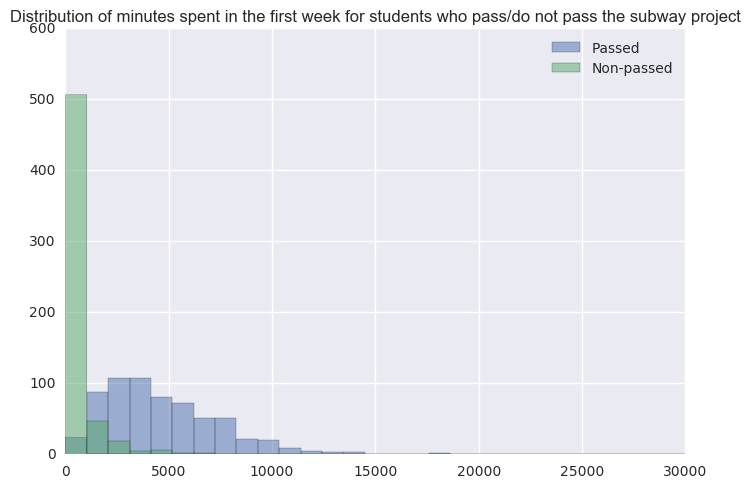

In [301]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt

bins = np.linspace(0, 30000, 30)

plt.hist(total_minutes_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(total_minutes_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass/do not pass the subway project')
plt.show()

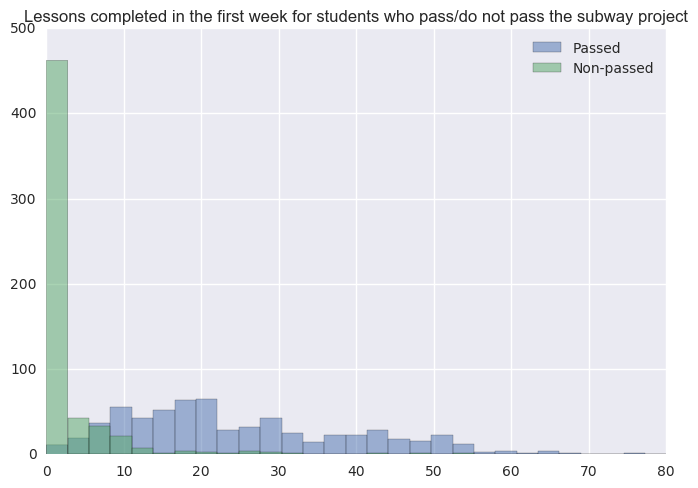

In [305]:
bins = np.linspace(0, 80, 30)

plt.hist(less_completed_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(less_completed_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Lessons completed in the first week ' + 
          'for students who pass/do not pass the subway project')
plt.show()

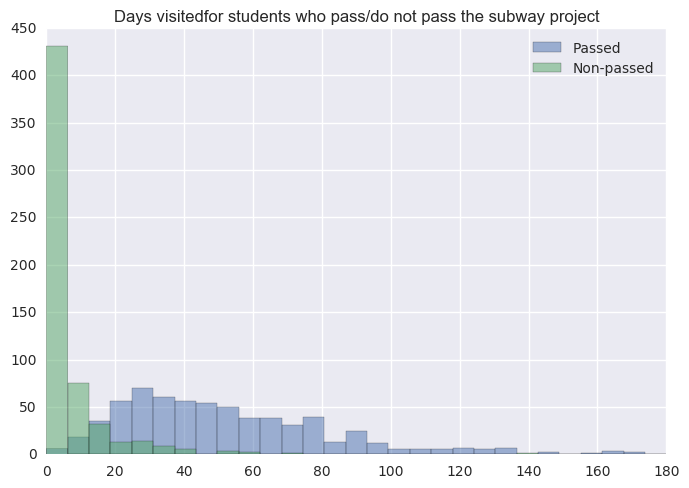

In [306]:
bins = np.linspace(0, 180, 30)
plt.hist(days_visited_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(days_visited_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Days visited' + 
          'for students who pass/do not pass the subway project')
plt.show()

## Improving Plots and Sharing Findings

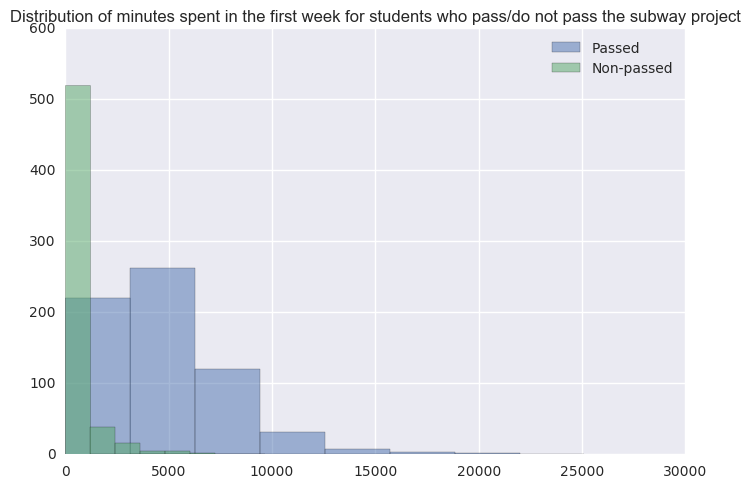

In [295]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


import seaborn as sns

"""plt.hist(total_minutes_pass.values(), bins=8, )
plt.xlabel('Minutes')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who do not pass the subway project')
plt.show()
plt.hist(total_minutes_non_pass.values(), bins=8)
plt.xlabel('Minutes')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass the subway project')

plt.show()
"""

plt.hist(total_minutes_pass.values(), bins = 8, alpha=0.5, label='Passed')
plt.hist(total_minutes_non_pass.values(), bins = 8, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass/do not pass the subway project')
plt.show()